ARIMA and SARIMA models are used to analyze time series data for Accessories product category 

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [17]:
# Load your time series data
data = pd.read_csv('sales_data_3.csv')
data['Date'] = pd.to_datetime(data['Date'])
#data.set_index('Date', inplace=True)
data

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [18]:

Accessories = data.loc[data['Product_Category'] == 'Accessories']

In [19]:
print(Accessories['Date'].min(),
      Accessories['Date'].max())


2013-07-01 00:00:00 2016-07-31 00:00:00


In [12]:
z = Accessories['Revenue'].resample('M').mean()
z1=pd.DataFrame(z)
z1

,Revenue
Date,
2013-07-31,229.807799
2013-08-31,224.693885
2013-09-30,233.296254
2013-10-31,216.187654
2013-11-30,221.223651
2013-12-31,229.387852
2014-01-31,205.470180
2014-02-28,213.306855
2014-03-31,218.412298


In [14]:
z1.isnull().sum()

Revenue    11
dtype: int64

In [15]:
# Calculate rolling average with a specified window
rolling_window =12# You can adjust this window size according to your needs
z1['Rolling_Avg'] = z1['Revenue'].rolling(window=rolling_window, min_periods=1).mean()

# Fill NaN values in 'Revenue' with corresponding values from 'Rolling_Avg'
z1['Revenue'].fillna(z1['Rolling_Avg'], inplace=True)

print(z1)

               Revenue  Rolling_Avg
Date                               
2013-07-31  229.807799   229.807799
2013-08-31  224.693885   227.250842
2013-09-30  233.296254   229.265979
2013-10-31  216.187654   225.996398
2013-11-30  221.223651   225.041849
2013-12-31  229.387852   225.766183
2014-01-31  205.470180   222.866754
2014-02-28  213.306855   221.671766
2014-03-31  218.412298   221.309603
2014-04-30  208.634006   220.042044
2014-05-31  222.124627   220.231369
2014-06-30  224.515812   220.588406
2014-07-31  199.000000   218.021090
2014-08-31  217.414472   217.414472
2014-09-30  215.826294   215.826294
2014-10-31  215.786142   215.786142
2014-11-30  215.106454   215.106454
2014-12-31  213.066254   213.066254
2015-01-31  214.332266   214.332266
2015-02-28  214.537349   214.537349
2015-03-31  213.568611   213.568611
2015-04-30  215.213480   215.213480
2015-05-31  211.757906   211.757906
2015-06-30  199.000000   199.000000
2015-07-31  220.646240   220.646240
2015-08-31  217.963460   219

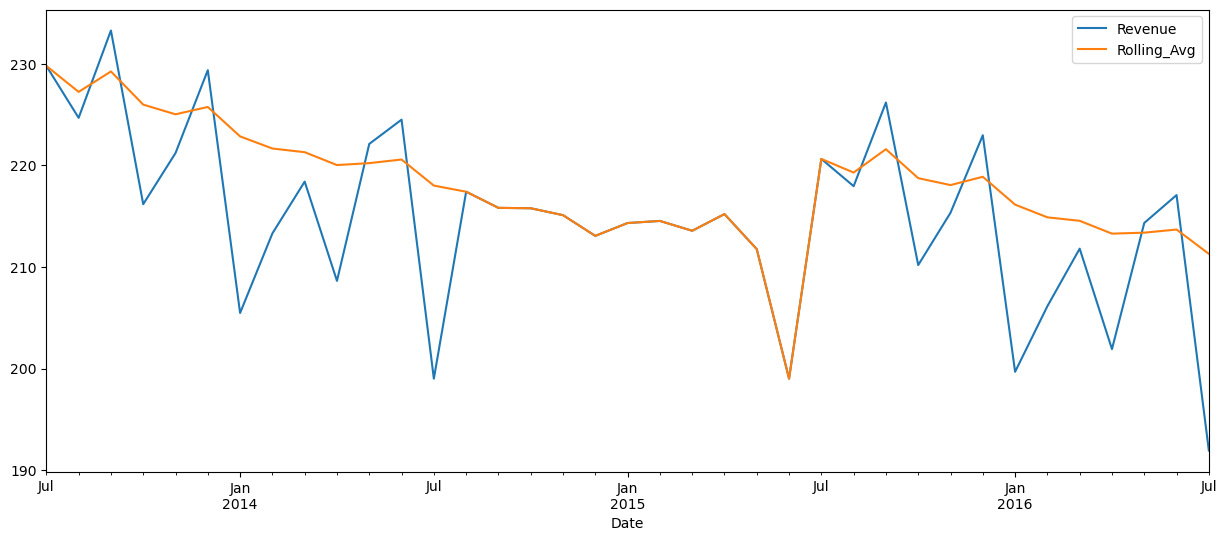

In [16]:
z1.plot(figsize=(15, 6))
plt.show()

In [21]:
# Drop the 'Rolling_Avg' column
z1.drop('Rolling_Avg', axis=1, inplace=True)
z1

,Date,Revenue
0,2013-07-31,229.807799
1,2013-08-31,224.693885
2,2013-09-30,233.296254
3,2013-10-31,216.187654
4,2013-11-30,221.223651
5,2013-12-31,229.387852
6,2014-01-31,205.470180
7,2014-02-28,213.306855
8,2014-03-31,218.412298
9,2014-04-30,208.634006


In [25]:
output_file='output_file.csv'
z1.to_csv(output_file,index=False)

In [26]:
z1.set_index('Date',inplace=True)
z1

,Revenue
Date,
2013-07-31,229.807799
2013-08-31,224.693885
2013-09-30,233.296254
2013-10-31,216.187654
2013-11-30,221.223651
2013-12-31,229.387852
2014-01-31,205.470180
2014-02-28,213.306855
2014-03-31,218.412298


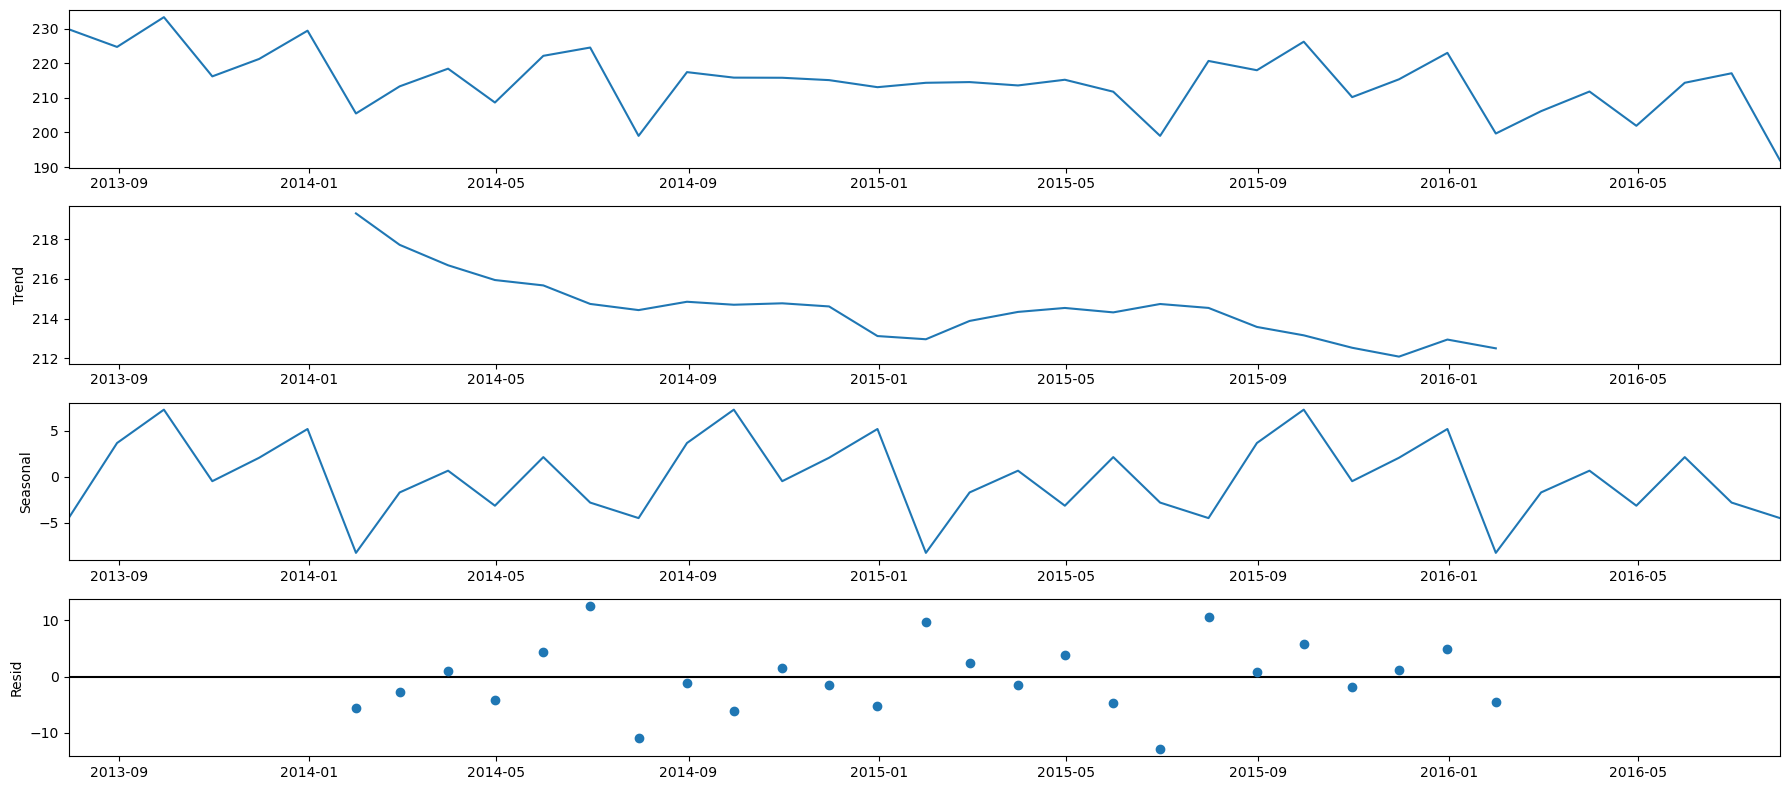

In [27]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(z1, model='additive')
fig = decomposition.plot()
plt.show()

In [100]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [101]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(z1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except :
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:490.7054734032798


C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:978.6457827767257
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:192.27360387488886
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:86.76801468427838
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:203.37158738839517
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:180.9942356410034
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:88.14033153102483


C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:83.54487255590993
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:435.30207148776174


C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1780.8700363437922
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:185.90693711316263
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:82.59954576259844
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:203.93380784848537
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:174.11099220711387
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:78.49228090231425


C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:65.79631994541532
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:274.8090531600829
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:174.12017153101658
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:203.42066648276446
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:84.39440709701799


C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:179.76599184712427
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:163.6439237554087
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:32.64335089542645


C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:26.490458550087414
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:249.556285220869
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:160.28273818035427
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:183.40266812530595


C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:72.06884749816699
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:173.40376408695053
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:152.71229642102986


C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:34.94578561334848
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:25.765335134922722
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:283.3017207114445


C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1100.729813212832
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:193.72075064173958
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:88.7297406618932
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:181.66619749728392
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:174.6615168672258
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:34.41883863167584


C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:36.41360461021633
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:254.1266118550816


C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1039.7273843220557
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:185.46865494733308
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:80.85378855958312
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:188.99774157603747


C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:156.92621195351543
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:35.52318474815942


C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters e

ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:29.533617179662272
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:267.1346158333007
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:172.77938282277927
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:197.9172863875671
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:83.16216632694034
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:169.51684353975347
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:164.4838019779126


C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:24.667030123957808


C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:25.903942823681824
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:250.81697827162895
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:161.8784451079418
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:184.2948976576353


C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:72.08936425186883
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:166.0360046193746
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:154.37278509560417


C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:26.49798559688928


C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:26.80605222777749


C:\Users\vrish\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 has low AIC:24.667030123957808 value so we should consider this value

Fitting the SARIMA model

In [136]:
mod = sm.tsa.statespace.SARIMAX(z1,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2830      0.311     -0.911      0.362      -0.892       0.326
ar.S.L12      -0.9821      0.016    -61.482      0.000      -1.013      -0.951
sigma2         0.3195      0.166      1.924      0.054      -0.006       0.645


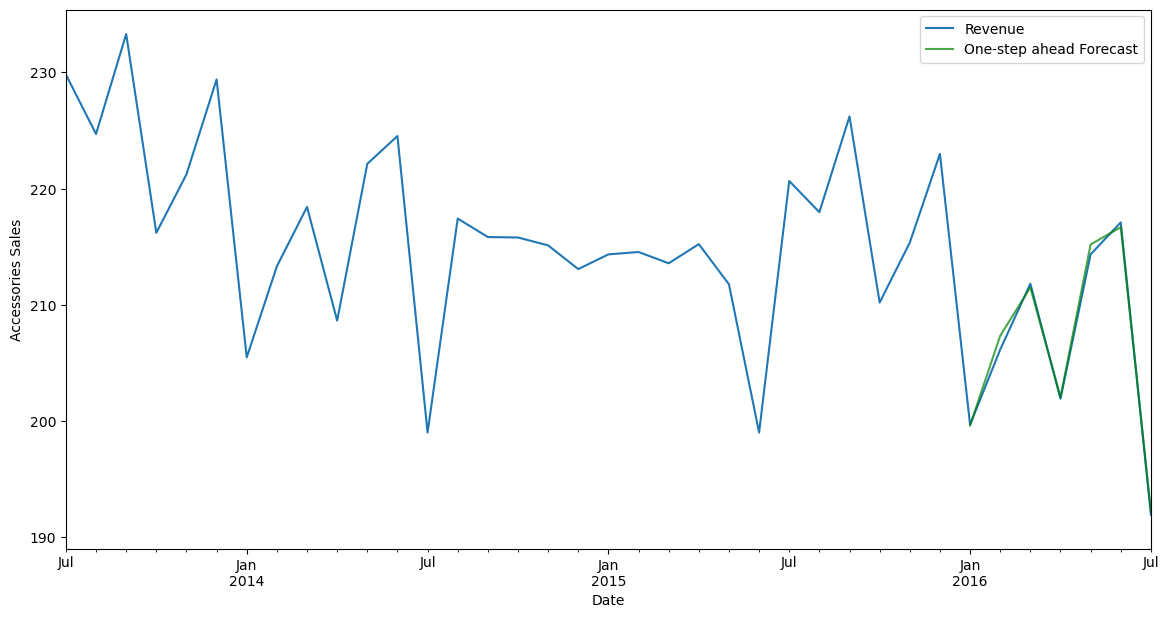

In [112]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = z1['2013-7-31':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',color='green', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Accessories Sales')
plt.legend()
plt.show()

In [131]:
z1_forecasted = pred.predicted_mean
z1_truth = z1['2016-01-31':]

# Ensure matching indices
z1_forecasted = z1_forecasted[z1_truth.index]
#calculate mse value
mse = mean_squared_error(z1_truth,z1_forecasted)

print('The Mean Squared Error of our forecasts is {}'.format(round(mse,2)))

The Mean Squared Error of our forecasts is 0.36


MSE measures the average of the squared differences between your forecasted and actual values. A lower MSE indicates better accuracy, and a value of 0.36 suggests that, on average, the squared differences between your forecasted and actual values are relatively small.

In [130]:
#calculate Rmse value
import numpy as np
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.6


RMSE is the square root of the MSE and provides a more interpretable measure of the accuracy in the same units as the original data. An RMSE of 0.6 means that, on average, your forecasted values are about 0.6 units away from the actual values.

Producing and visualizing forecasts

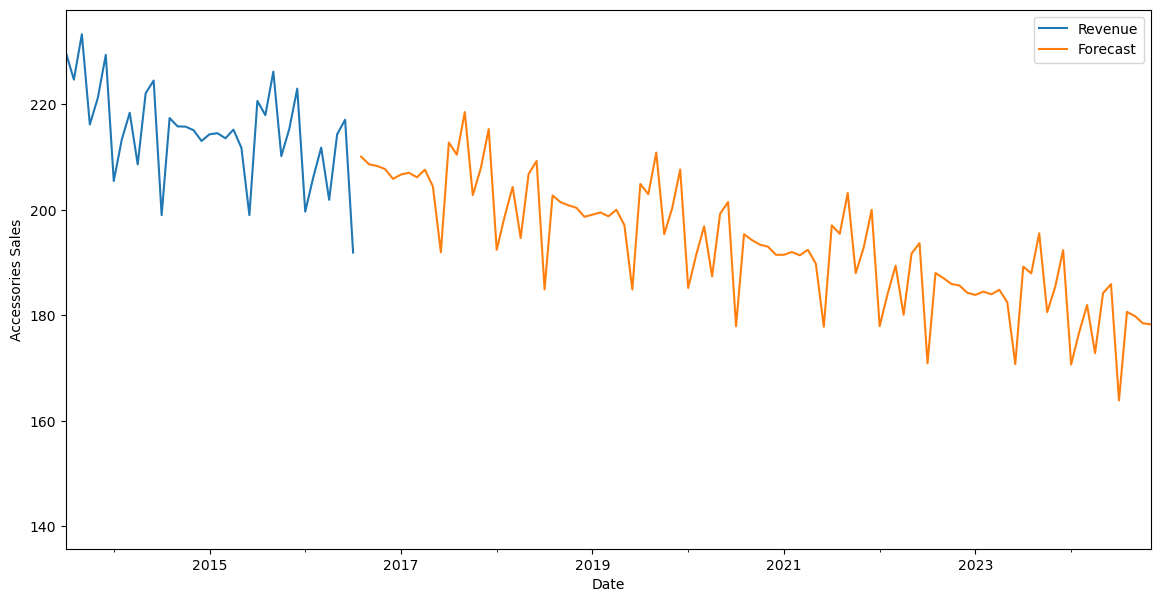

In [132]:
#ploting forecasting graph for future year sales
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = z1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Accessories Sales')
plt.legend()
plt.show()